In [1]:
#Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
#Import dataset
data_df=pd.read_csv('/Users/trinitynewsome/Desktop/winequality-red.csv')

In [3]:
#descriptive statistics summary
data_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [4]:
data_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [18]:
pred_test = data_df.iloc[2]
pred_test.drop(['quality', 'total sulfur dioxide'], inplace=True)
pred_test

fixed acidity           7.800
volatile acidity        0.760
citric acid             0.040
residual sugar          2.300
chlorides               0.092
free sulfur dioxide    15.000
density                 0.997
pH                      3.260
sulphates               0.650
alcohol                 9.800
Name: 2, dtype: float64

In [6]:
#DATA CLEANING
#missing data
total = data_df.isnull().sum().sort_values(ascending=False)
percent = (data_df.isnull().sum()/data_df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
fixed acidity,0,0.0
volatile acidity,0,0.0
citric acid,0,0.0
residual sugar,0,0.0
chlorides,0,0.0
free sulfur dioxide,0,0.0
total sulfur dioxide,0,0.0
density,0,0.0
pH,0,0.0
sulphates,0,0.0


In [7]:

data_df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

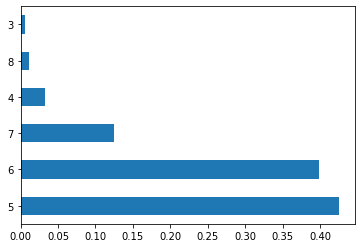

In [8]:
data_df.quality.value_counts(normalize=True).plot.barh()
plt.show()

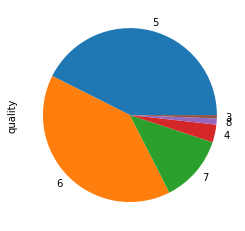

In [9]:
data_df.quality.value_counts(normalize=True).plot.pie()
plt.show()

<AxesSubplot:>

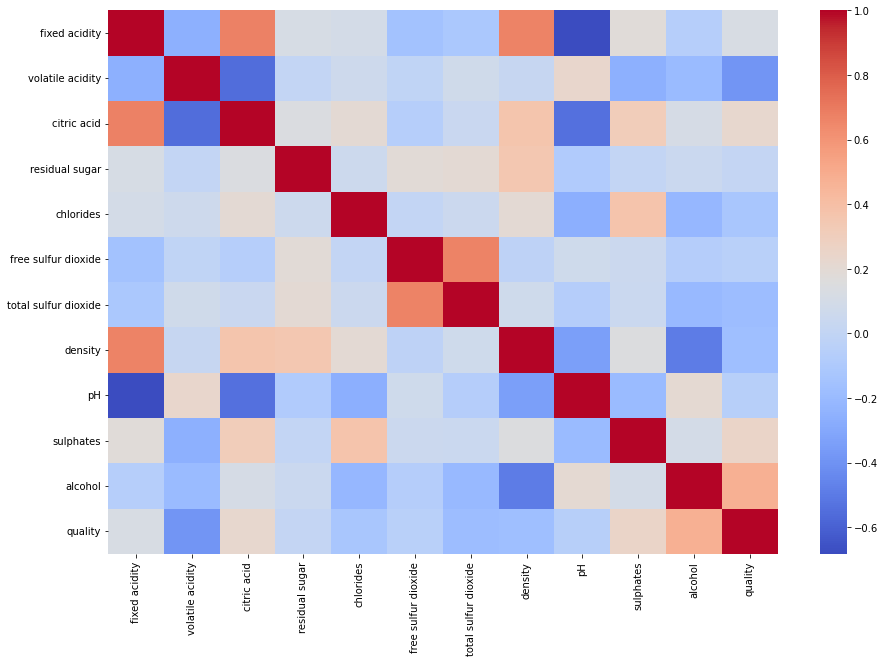

In [10]:
plt.figure(figsize=(15,10))
sns.heatmap(data_df.corr(), cmap='coolwarm')

In [11]:
data_df_new = data_df.drop('total sulfur dioxide', axis=1)
data_df_ml = pd.get_dummies(data_df_new, drop_first=True)
data_df_ml.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,0.9978,3.51,0.56,9.4,5


In [12]:
#Define variables 
x=data_df_ml.drop(['quality'], axis=1)
y=data_df['quality'].apply(lambda y: 1 if y>7 else 0)

In [13]:
print(x)


      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  

In [14]:
print(y)

0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: quality, Length: 1599, dtype: int64


In [15]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(x)
x_standard = scaler.transform(x)

x_standard

array([[-0.52835961,  0.96187667, -1.39147228, ...,  1.28864292,
        -0.57920652, -0.96024611],
       [-0.29854743,  1.96744245, -1.39147228, ..., -0.7199333 ,
         0.1289504 , -0.58477711],
       [-0.29854743,  1.29706527, -1.18607043, ..., -0.33117661,
        -0.04808883, -0.58477711],
       ...,
       [-1.1603431 , -0.09955388, -0.72391627, ...,  0.70550789,
         0.54204194,  0.54162988],
       [-1.39015528,  0.65462046, -0.77526673, ...,  1.6773996 ,
         0.30598963, -0.20930812],
       [-1.33270223, -1.21684919,  1.02199944, ...,  0.51112954,
         0.01092425,  0.54162988]])

In [20]:
pred_test = np.asarray(pred_test).reshape(1,-1)
scaler.fit(pred_test)
pred_test_std = scaler.transform(pred_test)

In [16]:
#split dataset into training and test set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.3, random_state=0)

In [21]:
# Logistic Regession 
from sklearn.linear_model import LogisticRegression

LogReg = LogisticRegression()
LogReg.fit(x_train, y_train)

y_pred = LogReg.predict(x_test)

In [23]:
y_pred_test_output = LogReg.predict(pred_test_std)
y_pred_test_output

array([0])

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
accuracy_score(y_test, y_pred)

# the model is highly accurate 

0.9895833333333334

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       475
           1       0.00      0.00      0.00         5

    accuracy                           0.99       480
   macro avg       0.49      0.50      0.50       480
weighted avg       0.98      0.99      0.98       480



In [ ]:
print(confusion_matrix(y_test, y_pred))

[[475   0]
 [  5   0]]


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(x_train, y_train)
rfc_pred = rfc.predict(x_test)

In [ ]:
accuracy_score(y_test, rfc_pred)

# this model is equally correct 

0.9895833333333334

In [ ]:
rfc.feature_importances_

array([0.08573213, 0.10187637, 0.0848765 , 0.06231707, 0.09310361,
       0.07990123, 0.13922452, 0.10817543, 0.10686023, 0.1379329 ])

<AxesSubplot:>

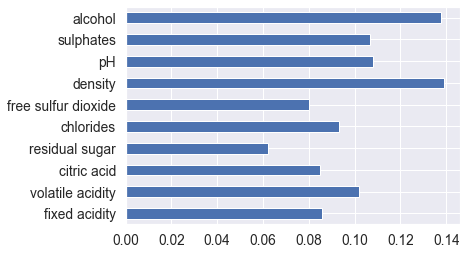

In [ ]:
pd.Series(rfc.feature_importances_, index=data_df_ml.drop('quality', axis=1).columns).plot(kind='barh')

Text(0.5, 1.0, 'Actual vs. Predicted')

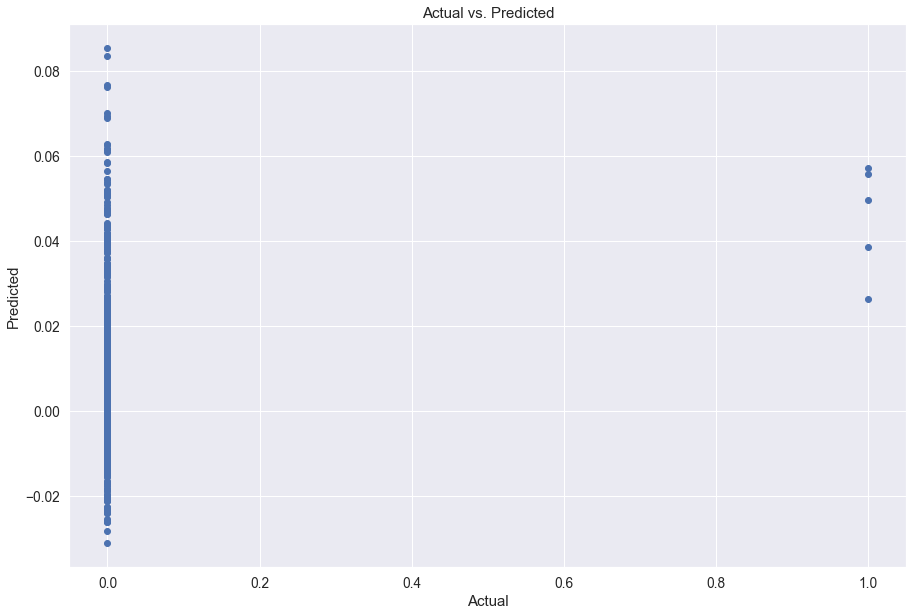

In [ ]:
#scatterplot
plt.figure(figsize=(15,10))
plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted')

In [ ]:
#predicted values 
pred_y_df=pd.DataFrame({'Actual Value':y_test, 'Predicted Value':y_pred, 'Difference': y_test - y_pred})
pred_y_df[0:20]

,Actual Value,Predicted Value,Difference
1109,0,0.010209,-0.010209
1032,0,-0.017749,0.017749
1002,0,0.039617,-0.039617
487,0,0.007963,-0.007963
979,0,0.008639,-0.008639
1054,0,0.003791,-0.003791
542,0,0.011332,-0.011332
853,0,0.006431,-0.006431
1189,0,-0.013664,0.013664
412,0,-0.000625,0.000625


In [ ]:
data_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


<AxesSubplot:xlabel='citric acid', ylabel='quality'>

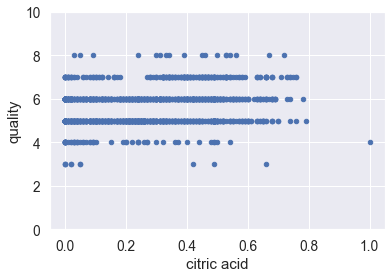

In [ ]:
#How much of an effect does a red wine’s citric acid, ph, 
# and chlorides have on its overall quality rating?
var = 'citric acid'
data = pd.concat([data_df['quality'], data_df[var]], axis=1)
data.plot.scatter(x=var, y='quality', ylim=(0,10))

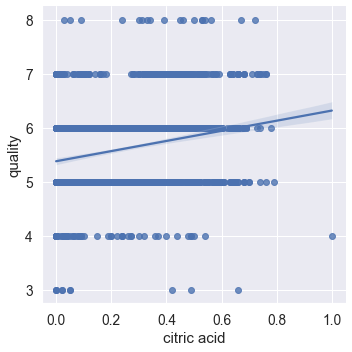

In [ ]:
sns.lmplot(x='citric acid', y='quality', data=data_df)

<AxesSubplot:xlabel='pH', ylabel='quality'>

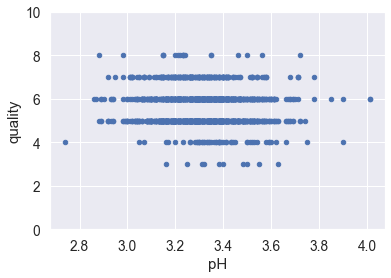

In [ ]:
#How much of an effect does a red wine’s citric acid, ph, 
# and chlorides have on its overall quality rating?
var = 'pH'
data = pd.concat([data_df['quality'], data_df[var]], axis=1)
data.plot.scatter(x=var, y='quality', ylim=(0,10))


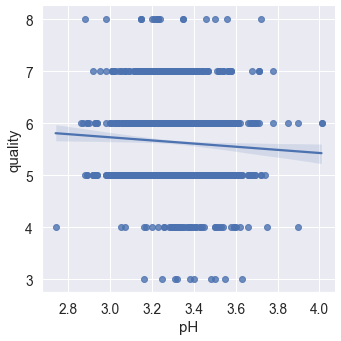

In [ ]:
sns.lmplot(x='pH', y='quality', data=data_df)

<AxesSubplot:xlabel='chlorides', ylabel='quality'>

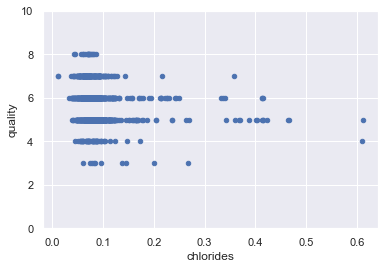

In [ ]:
#How much of an effect does a red wine’s citric acid, ph, 
# and chlorides have on its overall quality rating?
var = 'chlorides'
data = pd.concat([data_df['quality'], data_df[var]], axis=1)
data.plot.scatter(x=var, y='quality', ylim=(0,10))


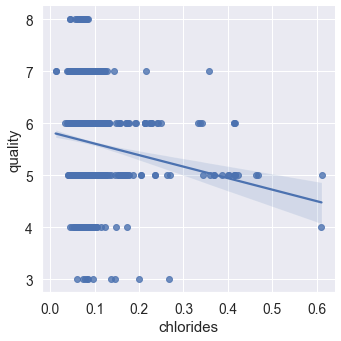

In [ ]:
sns.lmplot(x='chlorides', y='quality', data=data_df)

<AxesSubplot:xlabel='quality', ylabel='alcohol'>

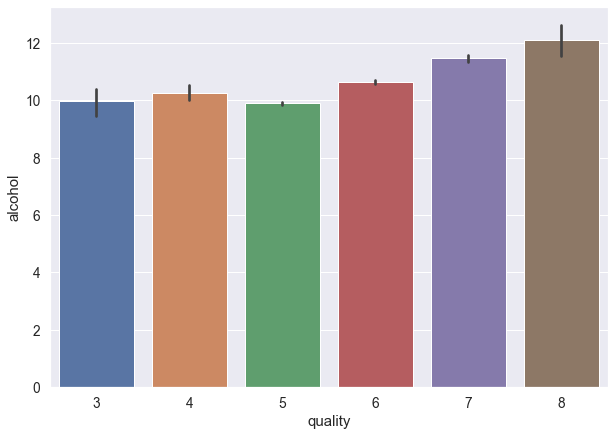

In [ ]:
plt.figure(figsize=(10,7))
sns.barplot(x='quality', y='alcohol', data=data_df)

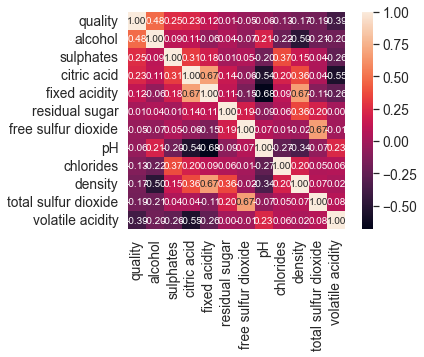

In [ ]:
#multivariate analysis
#Data visualization 
#Building correlation matrix

# Which factor has the highest relationship to the quality

k = 12 # number of variables for heatmap
corrmat = data_df.corr()
cols = corrmat.nlargest(k,'quality')['quality'].index
cm = np.corrcoef(data_df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10 }, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

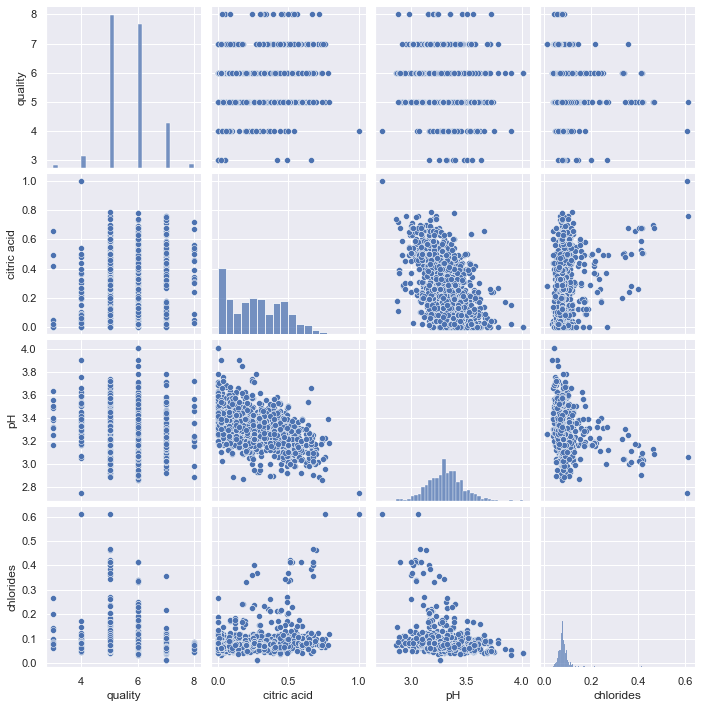

In [ ]:
sns.set()
cols = ['quality', 'citric acid', 'pH', 'chlorides']
sns.pairplot(data_df[cols], height = 2.5)
plt.show()

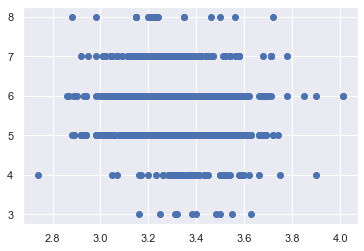

In [ ]:
plt.scatter(data_df.pH, data_df.quality)
plt.show()

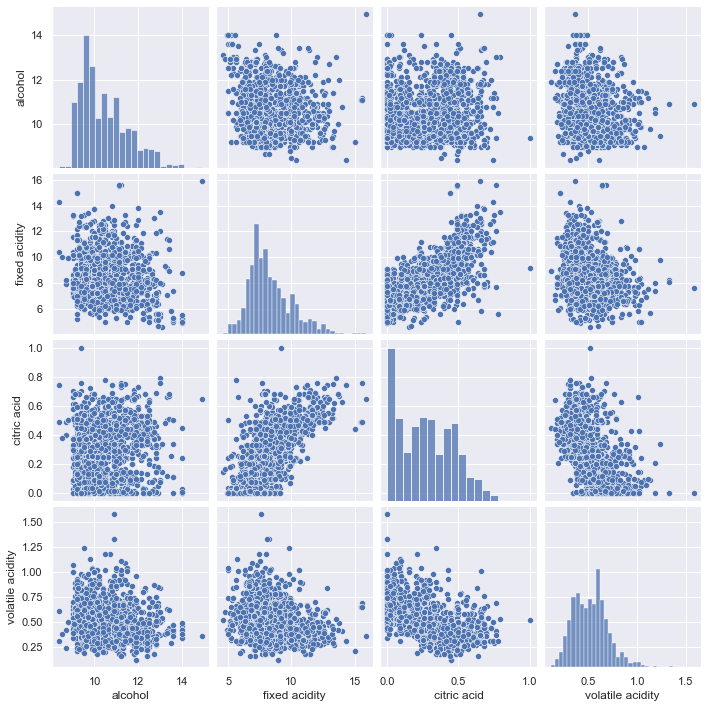

In [ ]:
# Does a red wines acidity levels (fixed, volatile, citrus) 
# compromise the alcohol content percentage? 

sns.set()
cols = ['alcohol', 'fixed acidity', 'citric acid', 'volatile acidity']
sns.pairplot(data_df[cols], height = 2.5)
plt.show()


In [ ]:
data_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


<AxesSubplot:xlabel='fixed acidity', ylabel='alcohol'>

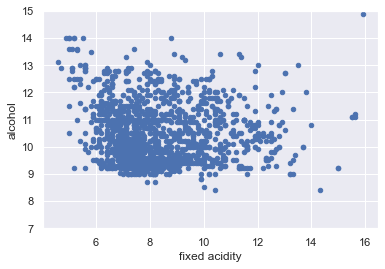

In [ ]:
# Does a red wines acidity levels (fixed, volatile, citrus) 
# compromise the alcohol content percentage? 
var = 'fixed acidity'
data = pd.concat([data_df['alcohol'], data_df[var]], axis=1)
data.plot.scatter(x=var, y='alcohol', ylim=(7,15))

<AxesSubplot:xlabel='volatile acidity', ylabel='alcohol'>

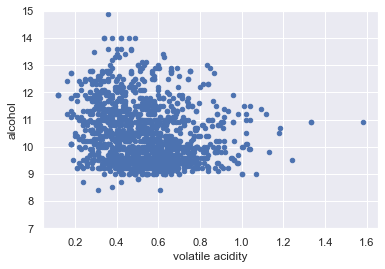

In [ ]:
var = 'volatile acidity'
data = pd.concat([data_df['alcohol'], data_df[var]], axis=1)
data.plot.scatter(x=var, y='alcohol', ylim=(7,15))

<AxesSubplot:xlabel='citric acid', ylabel='alcohol'>

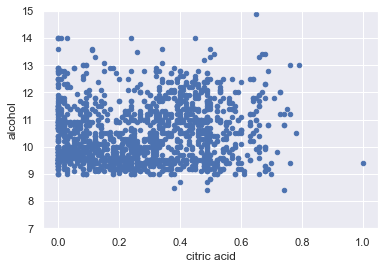

In [ ]:
var = 'citric acid'
data = pd.concat([data_df['alcohol'], data_df[var]], axis=1)
data.plot.scatter(x=var, y='alcohol', ylim=(7,15))

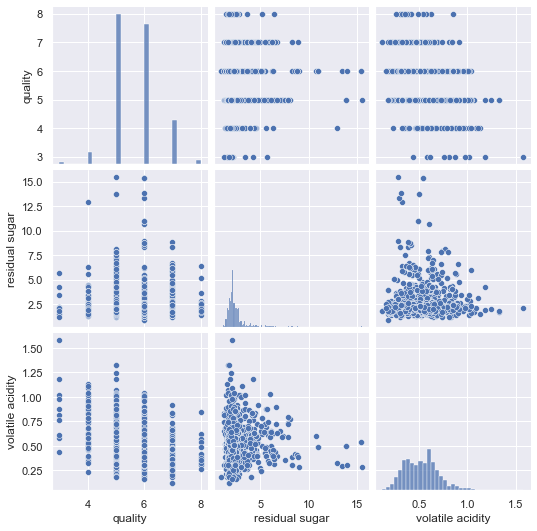

In [ ]:
# For wines with high amounts of volatile acid,
#  can the introduction of high levels of sugar 
# still contribute to a high quality rating?

sns.set()
cols = ['quality', 'residual sugar', 'volatile acidity']
sns.pairplot(data_df[cols], height = 2.5)
plt.show()


<AxesSubplot:>

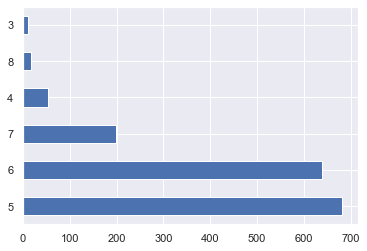

In [ ]:
# Is there a higher quality rate for wines that have high amounts of sugar or alcohol?
wine_by_quality = data_df['quality'].value_counts()
wine_by_quality[:20].plot(kind='barh')
